<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
print(boston_df.columns)
boston_df.head()

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.describe

<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

     

In [8]:
boston_df.info

<bound method DataFrame.info of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       

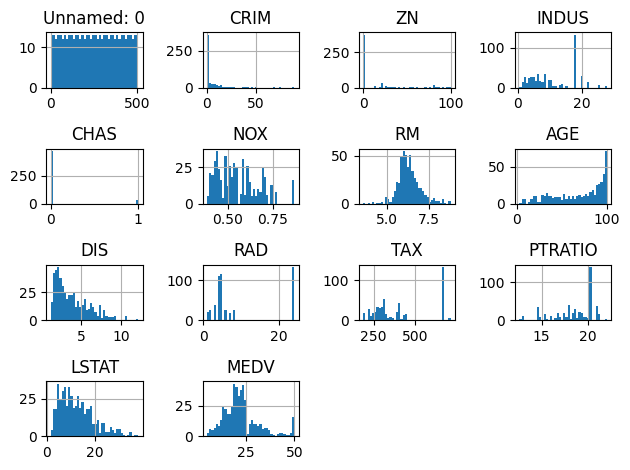

In [9]:
boston_df.hist(bins=40)
plt.tight_layout()

Text(0.5, 1.0, "MEDV: Median value of owner-occupied homes in $1000's")

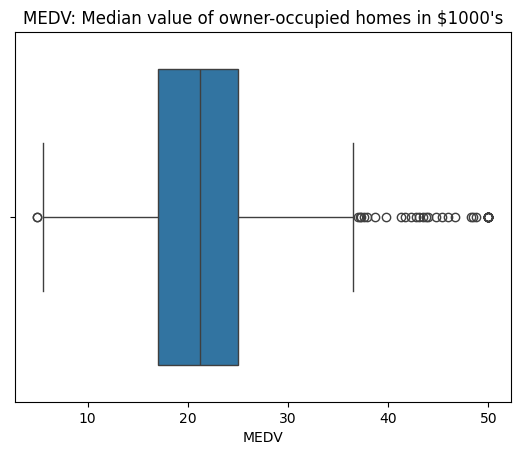

In [10]:
ax=sns.boxplot(x=boston_df["MEDV"])
ax.set_title("MEDV: Median value of owner-occupied homes in $1000's")

In [11]:
#ax=sns.barplot(boston_df["CHAS"])
#ax.set_title("CHAS: Charles River dummy variable (1 if track bounds river; 0 otherwise")

In [12]:
boston_df['CHAS'].sum()

35.0

<ipython-input-59-ed22421acc3a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(boston_df["CHAS"], kde=False)


Text(0.5, 1.0, 'CHAS: Charles River dummy variable (1 if track bounds river; 0 otherwise)')

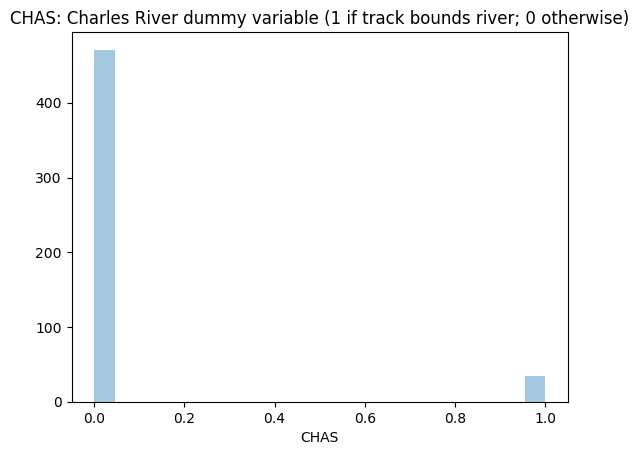

In [59]:
ax=sns.distplot(boston_df["CHAS"], kde=False)
ax.set_title("CHAS: Charles River dummy variable (1 if track bounds river; 0 otherwise)")

In [60]:
##axx = sns.distplot(boston_df["CHAS"], kde=False)
##for i in axx.containers:
##    axx.bar_label(i, )

In [61]:
##ax = sns.countplot(boston_df, x="CHAS")
##ax.set(
##    title="Bar plot of count for Charles River variable (CHAS)",
##    xlabel="Charles River variable (CHAS)")
##for i in ax.containers:
##    ax.bar_label(i, )
##pyplot.show()

In [14]:
bins = [0, 35, 70, boston_df["AGE"].max()]  # Upper bounds for each group (exclusive)
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

In [15]:
boston_df[boston_df["age_group"]=="35 years and younger"].shape[0] + boston_df[boston_df["age_group"]=="Between 35 and 70 years"].shape[0] + boston_df[boston_df["age_group"]=="70 years and older"].shape[0]

506

<AxesSubplot:xlabel='MEDV', ylabel='age_group'>

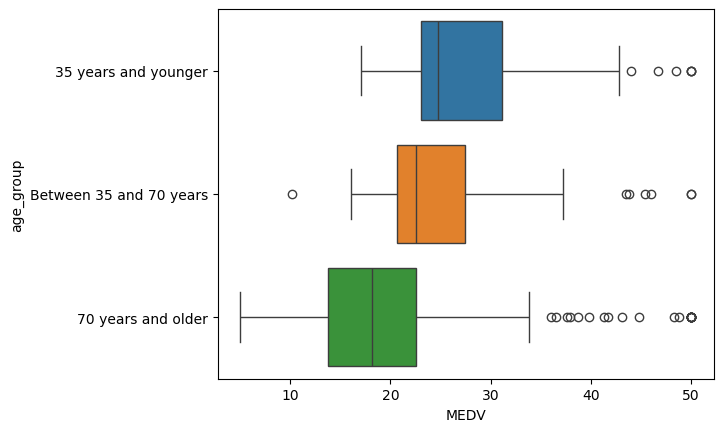

In [16]:
#sns.boxplot(boston_df["MEDV"], hue = age_group)
sns.boxplot(x = "MEDV", y = "age_group", hue = "age_group", data=boston_df)

Text(0.5, 1.0, 'Relationship between Ntric Oxide Concentrations and the proportion of non-retail business acres per town. ')

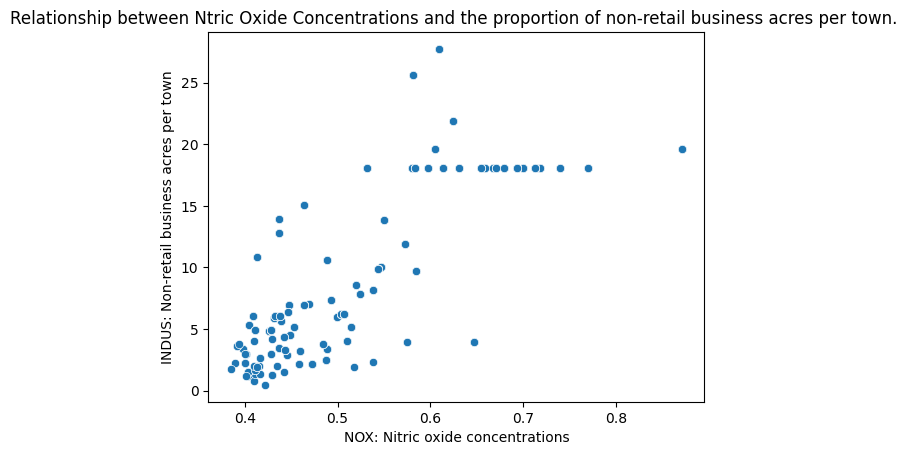

In [17]:
sns.scatterplot(x = "NOX", y = "INDUS", data=boston_df)
plt.xlabel("NOX: Nitric oxide concentrations")
plt.ylabel("INDUS: Non-retail business acres per town")
plt.title("Relationship between Ntric Oxide Concentrations and the proportion of non-retail business acres per town. ")

Text(0.5, 0, 'Pupil to teacher ratio')

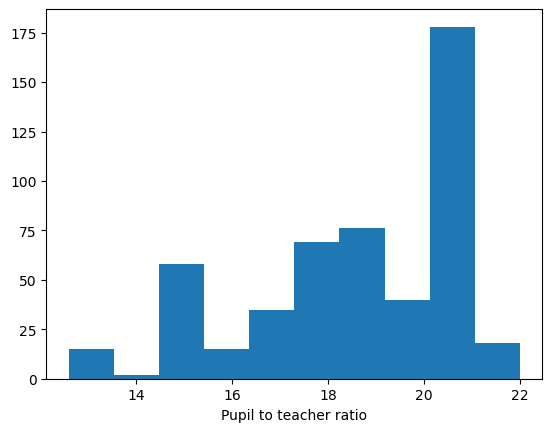

In [18]:
plt.hist(boston_df["PTRATIO"])#, bins=14)
plt.xlabel("Pupil to teacher ratio")
#sns.histplot(boston_df["PTRATIO"])

In [19]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start + "\nSTATISTICAL ANALYSIS\n\nnull hypothesis: there is no difference between median value of houses bounded by the Charles River or not.\n\nalternative hypothesis: there is a significant difference between the median value of houses bounded by the Charles River or not. \n " + bold_end)


STATISTICAL ANALYSIS

null hypothesis: there is no difference between median value of houses bounded by the Charles River or not.

alternative hypothesis: there is a significant difference between the median value of houses bounded by the Charles River or not. 
 


In [20]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [21]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start +" Comparing this calcuated p-value with 0.05 we see that \n p-value is very small, therefore  \n\n WE REJECT THE NULL HYPOTHSIS. \n\n Thus there is a diffrence between houses values based on their relative location to the river." + bold_end) 

 Comparing this calcuated p-value with 0.05 we see that 
 p-value is very small, therefore  

 WE REJECT THE NULL HYPOTHSIS. 

 Thus there is a diffrence between houses values based on their relative location to the river.


In [22]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start +" Median value of houses for each proportion of owner occupied units built prior to 1940\n\nnull hypothesis: there is no difference in the median value of houses for each proportion of owner occupied units built prior to 1940.\n\nalternative hypothesis: there is significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940." + bold_end) 

 Median value of houses for each proportion of owner occupied units built prior to 1940

null hypothesis: there is no difference in the median value of houses for each proportion of owner occupied units built prior to 1940.

alternative hypothesis: there is significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940.


In [41]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start +"BASED ON MY RESEARCH THIS DATASET WAS PRODUCED IN MID 70's.\nTHUS HOUSES BUILD PRIOR TO 1940 WERE HOUSES OVER 35 YEARS OLD.\nTHEREFORE I USE THE STRATIFIED AGE COLUMN I MADE FOR ONE OF THE EARLIER QUESTIONS, \nWHERE HOUSES WERE CATEGORIZED IN THREE GROUPS YOUNGER THAN 35 YEARS, OLDER THAT 70 YEARS, AND THE REST" + bold_end)

BASED ON MY RESEARCH THIS DATASET WAS PRODUCED IN MID 70's.
THUS HOUSES BUILD PRIOR TO 1940 WERE HOUSES OVER 35 YEARS OLD.
THEREFORE I USE THE STRATIFIED AGE COLUMN I MADE FOR ONE OF THE EARLIER QUESTIONS, 
WHERE HOUSES WERE CATEGORIZED IN THREE GROUPS YOUNGER THAN 35 YEARS, OLDER THAT 70 YEARS, AND THE REST


In [40]:
#boston_df["age_group"].unique

In [25]:
after_1940 = boston_df[boston_df["age_group"] == "35 years and younger"]["MEDV"]
prior_1940_1 = boston_df[boston_df["age_group"] == "Between 35 and 70 years"]["MEDV"]
way_prior_1940 = boston_df[boston_df["age_group"] == "70 years and older"]["MEDV"]
scipy.stats.f_oneway(after_1940,prior_1940_1,way_prior_1940,axis=0)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [26]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start +"We note that p-value is a very, very small number.\n\nThus, WE REJECT THE NULL HYPOTHESIS. \n\nThere is a diffrence between houses values prior to 1940", bold_end)

We note that p-value is a very, very small number.

Thus, WE REJECT THE NULL HYPOTHESIS. 

There is a diffrence between houses values prior to 1940 


In [27]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start + "Nitric oxide concentration and proportion of non-retail business acres per town", bold_end)
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start + "\nnull hypothesis: \nno relationship between nitric oxide concentrations and proportion of non-retail business acres per town.\n\nalternative hypothesis: \nthere is evidence of relationship between nitric oxide concentrations and proportion of non-retail business acres per town.", bold_end)

Nitric oxide concentration and proportion of non-retail business acres per town 

null hypothesis: 
no relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

alternative hypothesis: 
there is evidence of relationship between nitric oxide concentrations and proportion of non-retail business acres per town. 


In [28]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [29]:
print(bold_start + "Again, we note that p-value is really, really small. \n\nThus, WE REJECT THE NULL HYPOTHESIS. \n\nTherefore, there is evidence that ntiric oxide and business condensation are related", bold_end)

Again, we note that p-value is really, really small. 

Thus, WE REJECT THE NULL HYPOTHESIS. 

Therefore, there is evidence that ntiric oxide and business condensation are related 


In [30]:
print(bold_start + "\nTHE FINAL QUESTION\n" + bold_end)


THE FINAL QUESTION



In [33]:
X = boston_df["DIS"]
Y = boston_df["MEDV"]

In [34]:
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        19:42:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print(bold_start, "We note that the 'DIS coef' is 1.0916	, \nwhich means an adition of 1 unit distance to the Boston emplyment centers (DIS), \nwould result in an increase of 1.0916 * 1000 $ in median value of owner occupied houses increases", bold_end)

 We note that the 'DIS coef' is 1.0916	, 
which means an adition of 1 unit distance to the Boston emplyment centers (DIS), 
would result in an increase of 1.0916 * 1000 $ in median value of owner occupied houses increases 


In [39]:
print(bold_start,"We conclude that:\n weighted distance of the five Boston employment centres \n IMPACTS \n the median value of owner occupied houses in a positive and pretty significant way.", bold_end)

 We conclude that:
 weighted distance of the five Boston employment centres 
 IMPACTS 
 the median value of owner occupied houses in a positive and pretty significant way. 
